<a href="https://colab.research.google.com/github/ejay34/yandex_praktikum_projects/blob/main/02_%D0%98%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BF%D1%80%D0%BE%D0%B4%D0%B0%D0%B6_%D0%BA%D0%BE%D0%BC%D0%BF%D1%8C%D1%8E%D1%82%D0%B5%D1%80%D0%BD%D1%8B%D1%85_%D0%B8%D0%B3%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исследование о продаже игр интернет-магазина

В нашем распоряжении исторические данные о продажах игр, полученные из открытых источников доступны, оценки пользователей и экспертов, жанры и платформы

*Цель исследования:* Выявить закономерности, определяющие успешность игры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

*Этапы исследования:*
1. Чтение данных из файла. Общее знакомство с данными
2. Предобработка данных:
  - обработка пропусков в данных;
  - обработка дубликатов;
  - замена типов данных
3. Исследовательский анализ данных:
  - определение интенсивности выпуска игр в разные годы;
  - определение популярности продажи игр по платформам;
  - определение популярности платформ;
  - определение актуального периода исследования;
  - исследование влияния отзывов пользователей и критиков на продажи;
  - определение общего распределения игр по жанрам.
4. Составление портрета пользователя каждого региона:
  - Северная Америка
  - Европа
  - Япония
5. Проверка гипотез:
  - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
  - Средние пользовательские рейтинги жанров Action и Sports разные.
6. Итоговый вывод

### Откроем файл с данными и изучим общую информацию

<a id='section_1_1'></a>
#### Импортируем библиотеки, необходимые для проведения исследования. Считаем данные из csv-файла в датафрейм и сохраните в переменную df

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats as st

import seaborn as sns
import matplotlib.pyplot as plt

# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)

In [ ]:
# Считываем данные из csv-файла с применением обработчика ошибок
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [ ]:
# Выведем первые 5 строк датафрейма, чтобы получить представление о структуре данных
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<a id='section_1_2'></a>
#### Выведем основную информацию о датафрейме

In [ ]:
# Выводим и изучаем общую информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<a id='section_1_3'></a>
#### Найдем количество пропущенных значений в столбцах датафрейма

In [ ]:
pd.DataFrame(round(df.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
Name,0.000000
Platform,0.000000
Year_of_Release,1.600000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.300000
User_Score,40.100000


### Предобработка данных

#### Приведем к нижнему регистру все названия столбцов датафрейма

In [ ]:
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Заменим типы данных

In [ ]:
# Заменим тип данных в столбце year_of_release на int
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['user_score'] = pd.to_numeric(df['user_score'], downcast='float', errors='coerce')

**Промежуточный вывод:** Из полученных данных, на мой взгляд, только столбцы `year_of_release` и `user_score` требуют преобразования. Присваивать тип datetime столбцу `year_of_release` считаю нецелесообразно, потому что данные от этого не потеряют качества. Значения в столбце `user_score` заменили на float с применением параметра errors='coerce' для того, чтобы ошибочные данные заменялись на NaN

#### Обработка пропусков данных

In [ ]:
# Удалим строки с пропусками в столбцах 'name', 'genre' и 'year_of_release'
df.dropna(subset=['name', 'genre', 'year_of_release'], inplace=True)

# Заменим пропущенные данные в столбце 'rating'
df['rating'] = df['rating'].fillna('Unknow')

**Промежуточный вывод:**

Строки с пропусками в столбцах `name` и `genre` было решено удалить потому, что из всего датафрейма их было всего 2. Пропущенные строки из `year_of_release` занимали всего 1.6% от общего датасета.

Остальные пропуски было решено оставить нулевыми Удалять такой объем строк некорректно, а заменить их синтетическими данными не получилось, так как не прослеживалась явная взаимосвязь

Могу предположить, что пропуски были допущены по следующим причинам:

    - Ошибки в алгоритме сбора информации,
    - Оценка RP в рейтинге означает "Пока не определен", присваивается тем играм, которые находятся на этапе разработки или демо-версии.
    - Оценка tbd в столбце user_score так же означает "Пока не определен". Присутствие в датасете и значений NaN и tbd можно объяснить сбор данных их разных источников и, соответственно, разный подход.
    - Также данные могли испортиться в процессе обработки, сохранении и передачи информации.

#### Выполним проверку на явные дубликаты

In [ ]:
df.duplicated().sum()

0

**Промежуточный вывод:** Явных дубликатов не выявлено

#### Вычислим суммарные продажи во всех регионах и запишем в отдельный столбец `total_sales`

In [ ]:
df.insert(8,
          'total_sales',
          df[['na_sales', 'eu_sales',  'jp_sales', 'other_sales']]
          .sum(axis=1))
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,Unknow
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,Unknow


### Исследовательский анализ данных

#### Изучим, сколько игр выпускалось в разные годы

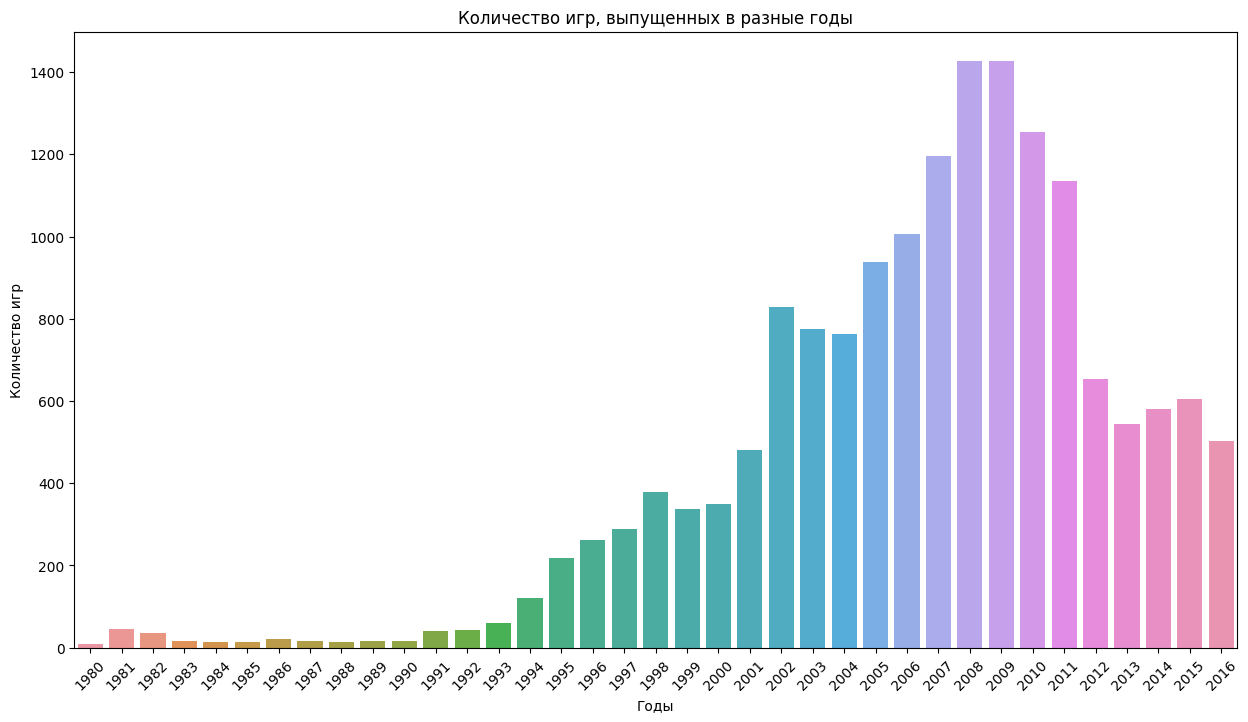

In [ ]:
games_per_years = (
    df.pivot_table(index='year_of_release', values='name', aggfunc='count')
    .reset_index()
)

# Построим график распределения
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=games_per_years, x='year_of_release', y='name')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Количество игр, выпущенных в разные годы')
plt.xlabel('Годы')
plt.ylabel('Количество игр')
plt.show();

**Промежуточный вывод:** Наибольшее количество игр было выпущено в период с 2008 по 2010 года.

Данные за все периоды брать некорректно, так как платформы, с течением времени, сменяли одна другую. Значит, необходимо найти данные, которые будут представлять актуальную информацию

<a id='section_3_2'></a>
#### Изучим, как менялись продажи по платформам

In [ ]:
# Найдем платформы с наибольшими суммарными продажами
sales_per_platform = (
    df.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
)
sales_per_platform.head(10)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


**Промежуточный вывод:** Наибольшие суммарные продажи у платформы PS2. Следом идут X360, PS3, Wii, DS

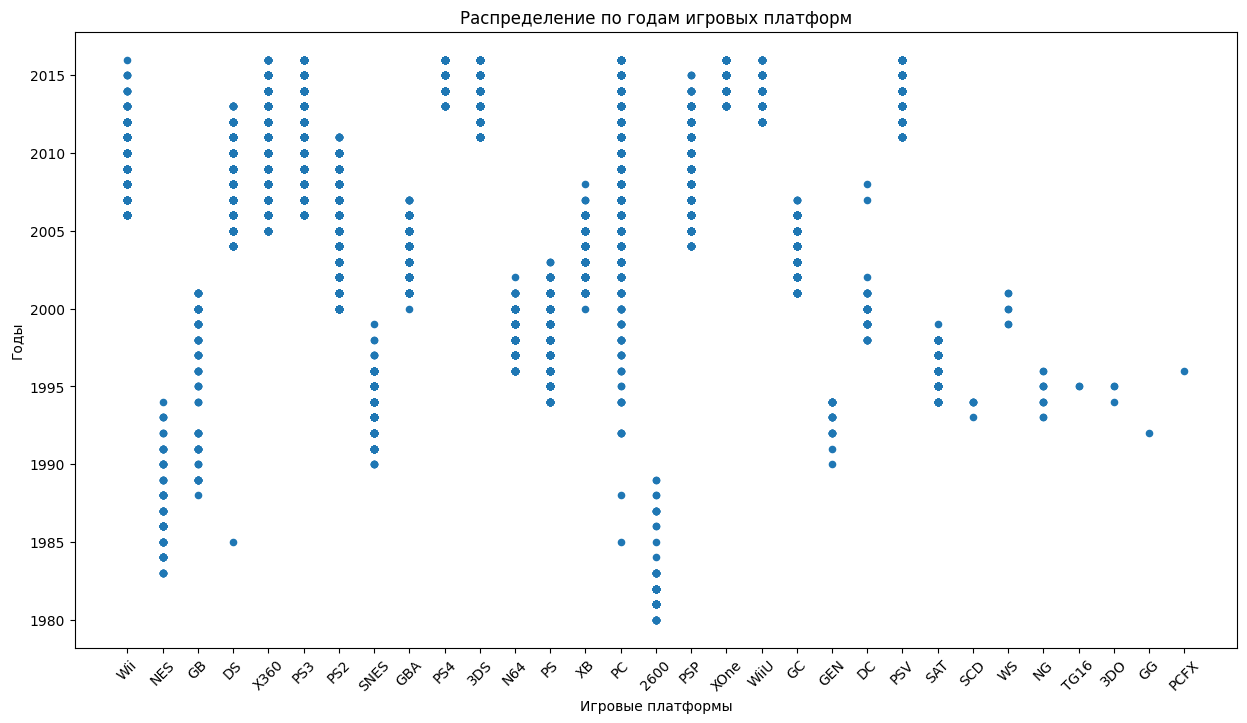

In [ ]:
# Построим распределение найденных платформ по годам
ax = df.plot.scatter(x='platform',
                     y='year_of_release',
                     figsize=(15, 8))

plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Распределение по годам игровых платформ')
plt.xlabel('Игровые платформы')
plt.ylabel('Годы')
plt.show();

**Промежуточный вывод:** Судя по построенному графику, характерный "срок жизни" платформы составляет от 8 от 11 лет.

Исходя из предыдущих выводов определим ***актуальный период*** для построения прогноза - от 2008 до 2016 года

#### Выясним, какие платформы лидируют по продажам

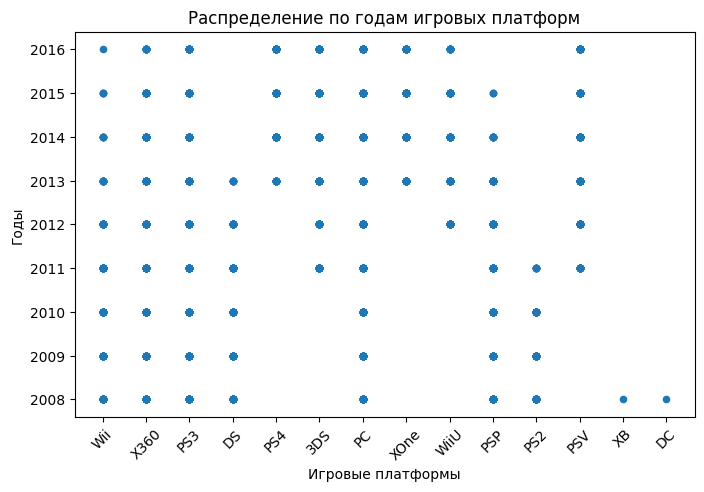

In [ ]:
ax = df[df['year_of_release'] >= 2008].plot.scatter(x='platform', y='year_of_release', figsize=(8, 5))

plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Распределение по годам игровых платформ')
plt.xlabel('Игровые платформы')
plt.ylabel('Годы')
plt.show();

**Промежуточный итог:** Отсеим платформы, которые уже не актуальны - это DS, PSP, PS2, XB и DC. Также можно отбросить платформы Wii, X360 и PS3, так как их "срок жизни" близок к критическому.

Платформы PS4, 3DS, XOne, WiiU и PSV сейчас находятся в начале или середине характерного "жизненного пути". Далее будем их рассматривать, как потенциально прибыльные

In [ ]:
# Создадим список потенциально прибыльных платформ
potentially_profit_platform = ['PS4', '3DS', 'XOne', 'WiiU', 'PSV', 'PC']

<a id='section_3_4'></a>
#### Возьмем данные, выбранные за актуальный период

In [ ]:
df_actual_period = (df[df["year_of_release"] >= 2013]
                    .query('@potentially_profit_platform in platform')
                    .reset_index())

<a id='section_3_5'></a>
#### Изучим, какие платформы лидируют по продажам

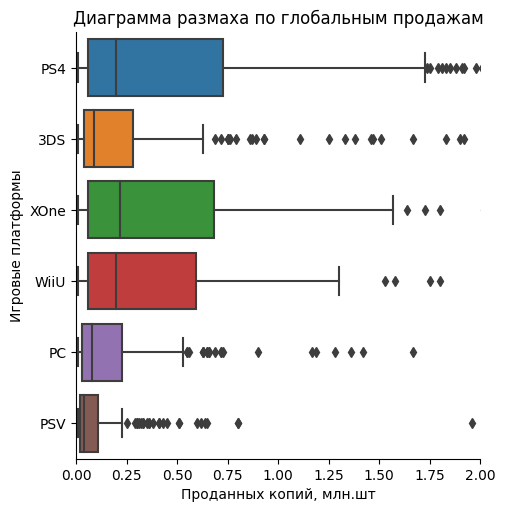

In [ ]:
sns.catplot(data=df_actual_period, x="total_sales", y="platform", kind='box')
plt.xlim(0, 2)
plt.title('Диаграмма размаха по глобальным продажам')
plt.ylabel('Игровые платформы')
plt.xlabel('Проданных копий, млн.шт')
plt.show();

**Промежуточный итог:** По графикам видим, что наибольшие глобальные продажи приносят платформы PS4, XOne и WiiU. Медианные значения суммарной прибыли находится вблизи отметки 250000 проданных копий

#### Исследуем, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. В качестве популярной платформы возьмем PS4

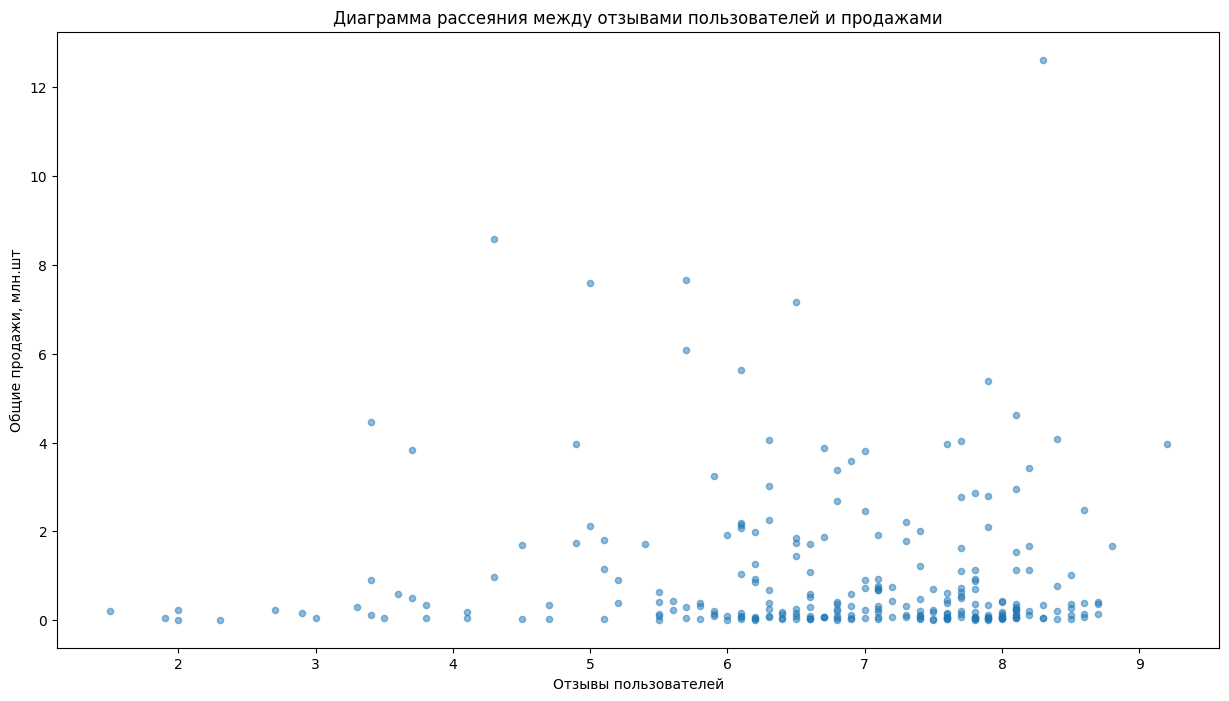

In [ ]:
# Построим диаграмму рассеяния
ps_sales = df_actual_period.query('platform == "PS4"')
ps_sales.plot(x='user_score', y='total_sales', kind='scatter', figsize=(15,8), alpha=0.5)
plt.title('Диаграмма рассеяния между отзывами пользователей и продажами')
plt.ylabel('Общие продажи, млн.шт')
plt.xlabel('Отзывы пользователей')
plt.show();

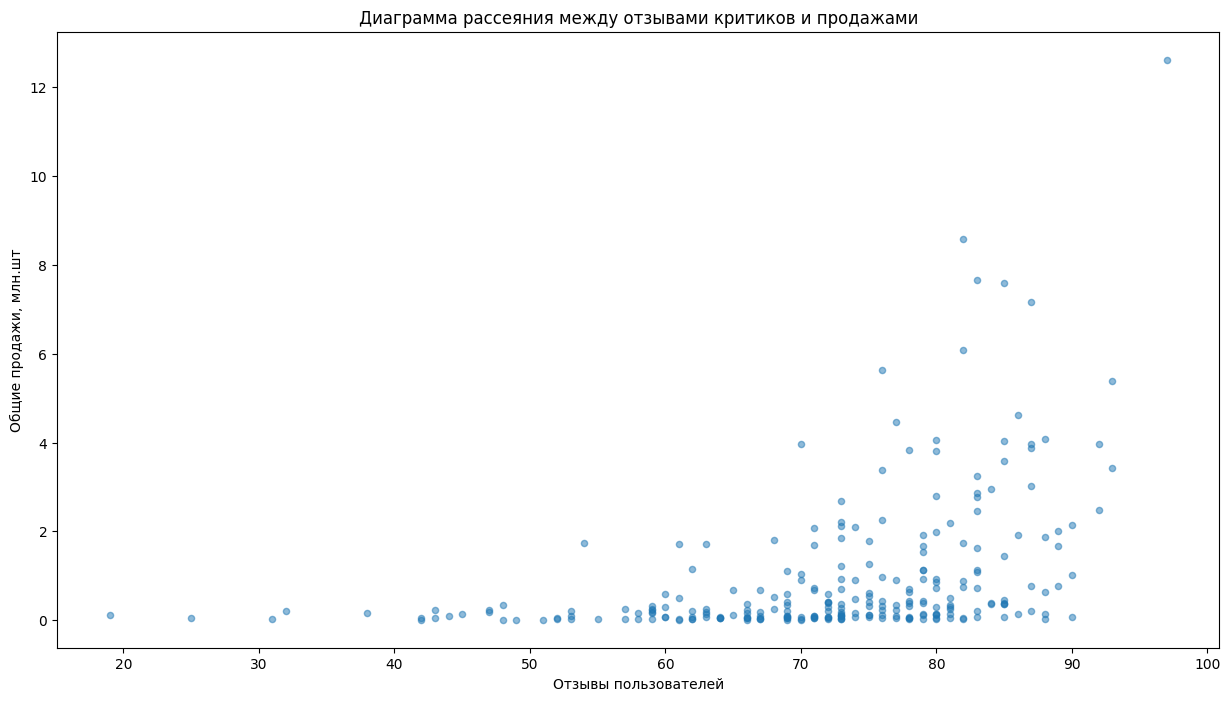

Корреляция между отзывами пользователей и продажами: -0.031957109005188285
Корреляция между отзывами критиков и продажами: 0.40656790206178095


In [ ]:
# Построим диаграмму рассеяния
ps_sales = df_actual_period.query('platform == "PS4"')
ps_sales.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(15,8), alpha=0.5)
plt.title('Диаграмма рассеяния между отзывами критиков и продажами')
plt.ylabel('Общие продажи, млн.шт')
plt.xlabel('Отзывы пользователей')
plt.show();

# Найдем корреляцию между отзывами пользователей и продажами
print('Корреляция между отзывами пользователей и продажами:', ps_sales['user_score'].corr(ps_sales['total_sales']))
print('Корреляция между отзывами критиков и продажами:', ps_sales['critic_score'].corr(ps_sales['total_sales']))

**Промежуточный итог:** Исходя из полученных данных можно сделать вывод о том, что оценки пользователей имели слабое обратное влияние на продажи игр данной платформы. При этом, оценки критиков давольно сильно влияли на показатель глобальных продаж

<a id='section_3_7'></a>
#### Соотнесем выводы для остальных платформ из списка потенциально прибыльных

In [ ]:
for platform in potentially_profit_platform:
    corr_user_platform = (df_actual_period.loc[df_actual_period['platform'] == platform]['user_score']
                       .corr(df_actual_period.loc[df_actual_period['platform'] == platform]['total_sales']))
    corr_critic_platform = (df_actual_period.loc[df_actual_period['platform'] == platform]['critic_score']
                            .corr(df_actual_period.loc[df_actual_period['platform'] == platform]['total_sales']))
    print(f'Для {platform}:')
    print('Корреляция между отзывами пользователей и продажами:', round(corr_user_platform, 3))
    print('Корреляция между отзывами критиков и продажами:', round(corr_critic_platform, 2))
    print()

Для PS4:
Корреляция между отзывами пользователей и продажами: -0.032
Корреляция между отзывами критиков и продажами: 0.41

Для 3DS:
Корреляция между отзывами пользователей и продажами: 0.242
Корреляция между отзывами критиков и продажами: 0.36

Для XOne:
Корреляция между отзывами пользователей и продажами: -0.069
Корреляция между отзывами критиков и продажами: 0.42

Для WiiU:
Корреляция между отзывами пользователей и продажами: 0.419
Корреляция между отзывами критиков и продажами: 0.38

Для PSV:
Корреляция между отзывами пользователей и продажами: 0.001
Корреляция между отзывами критиков и продажами: 0.25

Для PC:
Корреляция между отзывами пользователей и продажами: -0.094
Корреляция между отзывами критиков и продажами: 0.2



**Промежуточный итог:** В большинстве случаев, вывод по платформам PC, PSV и XOne аналогичен PS4. Однако, если рассматривать портативные виды платформ, такие как 3DS и WiiU, то мы увидим, что отзывы пользователей также начинают влиять на глобальные продажи

<a id='section_3_8'></a>
#### Проверим общее распределение игр по жанрам

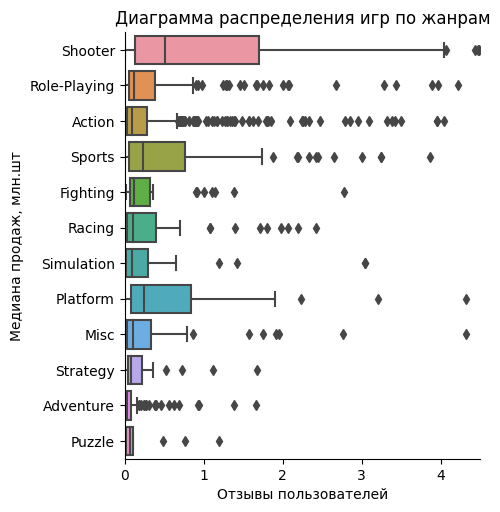

In [ ]:
df_actual_genre = df_actual_period.query('@potentially_profit_platform in platform')

sns.catplot(data=df_actual_genre, x="total_sales", y="genre", kind='box')
#plt.setp(ax.get_xticklabels(), rotation=45)
plt.xlim(0, 4.5)
plt.title('Диаграмма распределения игр по жанрам')
plt.ylabel('Медиана продаж, млн.шт')
plt.xlabel('Отзывы пользователей')
plt.show();

**Промежуточный итог:** На данном графике видим явное преимущество жанра Shooter. Медианные продажи в этом жанре в 2 раза превышают, идущие следом жанры Platform и Sports.

К жанрам с низкими показателями продаж относятся  Adventure и Puzzle.

### Составьте портрет пользователя каждого региона

<a id='section_4_1'></a>
#### Северная Америка

<a id='section_4_1_1'></a>
##### Самые популярные платформы

In [ ]:
# Найдем Топ-5 платформ в Северной Америке
(
    df_actual_period
    .pivot_table(index='platform', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .head()
)

,na_sales
platform,
PS4,108.74
XOne,93.12
3DS,38.20
WiiU,29.21
PC,11.11


In [ ]:
for platform, group in df_actual_period.groupby('platform'):
    share_sales = (group['na_sales'] / group['total_sales']).median()
    print()
    print(f'Доля продаж игр для платформы {platform} в Северной Америке - {share_sales:.2%}')


Доля продаж игр для платформы 3DS в Северной Америке - 0.00%

Доля продаж игр для платформы PC в Северной Америке - 0.00%

Доля продаж игр для платформы PS4 в Северной Америке - 31.22%

Доля продаж игр для платформы PSV в Северной Америке - 0.00%

Доля продаж игр для платформы WiiU в Северной Америке - 47.37%

Доля продаж игр для платформы XOne в Северной Америке - 57.46%


**Промежуточный вывод:** В Северной Америке большей популярностью пользуются такие платформы, как XOne, WiiU и PS4. Портативные консоли 3DS и PSV популярностью в данном регионе практически не пользовались.

<a id='section_4_1_2'></a>
##### Самые популярные жанры

In [ ]:
(
    df_actual_period
    .pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
)

,na_sales
genre,
Shooter,75.37
Action,73.43
Role-Playing,37.92
Sports,37.09
Platform,14.18
Misc,12.69
Fighting,12.10
Racing,10.29
Adventure,4.57


**Промежуточный вывод:** В Северной Америке гораздо охотнее приобретают игры жанров Action и Shooter. Игры, жанров Strategy, Puzzle занимают последние строки рейтинга по региону. Можно предположить, что в Северной Америке предпочитают игры, для переживания острых ощущений в безопасной среде

<a id='section_4_1_3'></a>
##### Влияние рейтинга ESRB на продажи

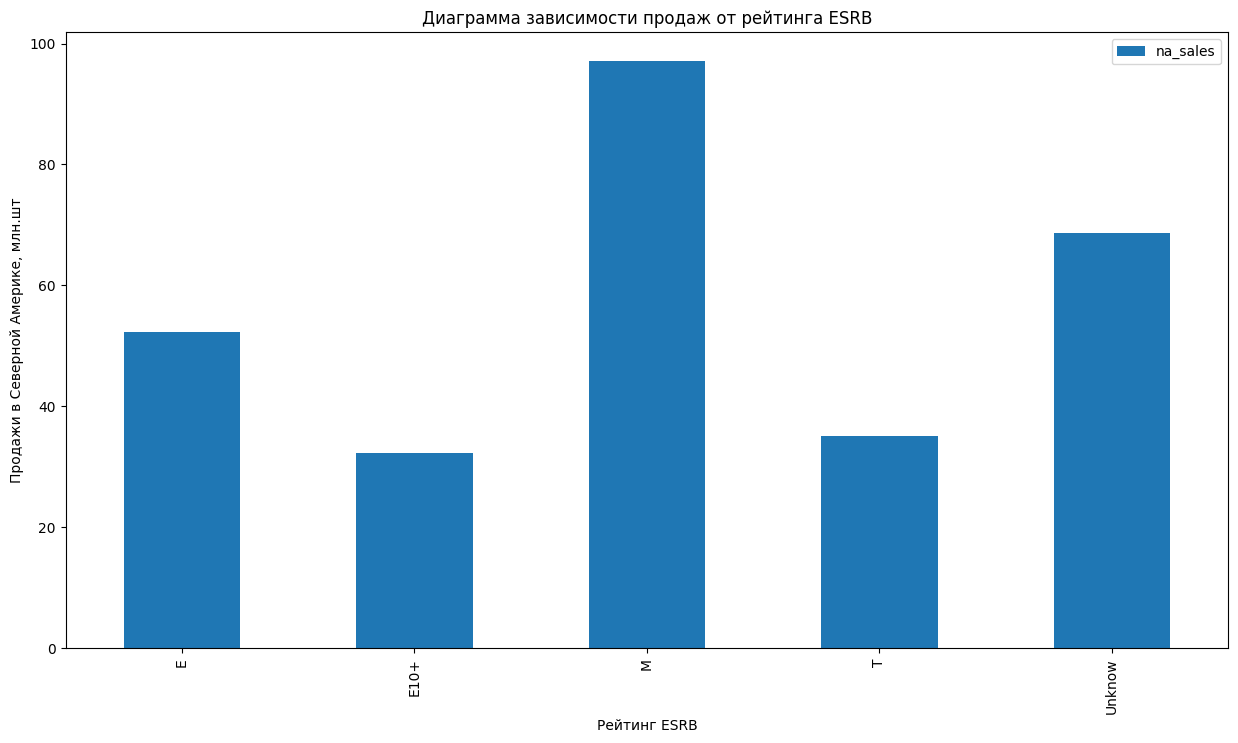

In [ ]:
(
    df_actual_period
    .pivot_table(index='rating', values='na_sales', aggfunc='sum')
    .plot(kind='bar', figsize=(15,8))
)
plt.title('Диаграмма зависимости продаж от рейтинга ESRB')
plt.ylabel('Продажи в Северной Америке, млн.шт')
plt.xlabel('Рейтинг ESRB')
plt.show();

<a id='section_4_2'></a>
#### Европа

<a id='section_4_2_1'></a>
##### Самые популярные платформы

In [ ]:
(
    df_actual_period
    .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .head()
)

,eu_sales
platform,
PS4,141.09
XOne,51.59
3DS,30.96
PC,25.36
WiiU,19.85


In [ ]:
for platform, group in df_actual_period.groupby('platform'):
    share_sales = (group['eu_sales'] / group['total_sales']).median()
    print()
    print(f'Доля продаж игр для платформы {platform} в Европе - {share_sales:.2%}')


Доля продаж игр для платформы 3DS в Европе - 0.00%

Доля продаж игр для платформы PC в Европе - 92.86%

Доля продаж игр для платформы PS4 в Европе - 41.03%

Доля продаж игр для платформы PSV в Европе - 0.00%

Доля продаж игр для платформы WiiU в Европе - 33.33%

Доля продаж игр для платформы XOne в Европе - 33.33%


**Промежуточный вывод:** В Европе ситуация аналогична Северной Америке. Большей популярностью пользуются такие платформы, как XOne, WiiU и PS4. Портативные консоли 3DS и PSV, при этом, совсем не пользовались популярностью или не продавались в данном регионе.

<a id='section_4_2_2'></a>
##### Самые популярные жанры

In [ ]:
df_actual_period.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)

,eu_sales
genre,
Action,73.96
Shooter,64.89
Sports,38.63
Role-Playing,32.00
Racing,15.18
Platform,12.16
Misc,10.61
Simulation,10.17
Fighting,6.58


**Промежуточный вывод:** По распределению жанров игр Европа почти в точности повторяет Северную Америку. На первых местах находятся жанры Action и Shooter, а игры заставляющие использовать мыслительные способности занимают последние места в рейтинге

<a id='section_4_2_3'></a>
##### Влияние рейтинга ESRB на продажи

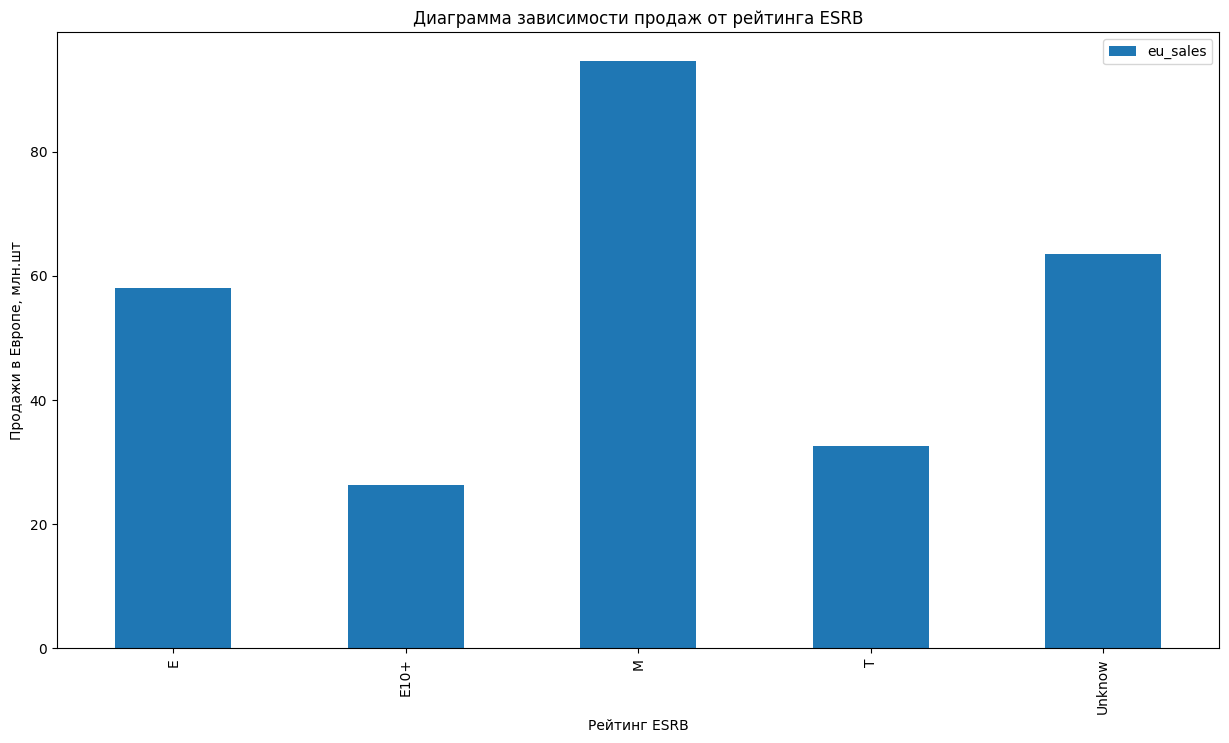

In [ ]:
(
    df_actual_period
    .pivot_table(index='rating', values='eu_sales', aggfunc='sum')
    .plot(kind='bar', figsize=(15,8))
)
plt.title('Диаграмма зависимости продаж от рейтинга ESRB')
plt.ylabel('Продажи в Европе, млн.шт')
plt.xlabel('Рейтинг ESRB')
plt.show();

<a id='section_4_3'></a>
#### Япония

<a id='section_4_3_1'></a>
##### Самые популярные платформы

In [ ]:
(
    df_actual_period
    .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .head()
)

,jp_sales
platform,
3DS,67.81
PSV,18.59
PS4,15.96
WiiU,10.88
XOne,0.34


In [ ]:
for platform, group in df_actual_period.groupby('platform'):
    share_sales = (group['jp_sales'] / group['total_sales']).median()
    print()
    print(f'Доля продаж игр для платформы {platform} в Японии - {share_sales:.2%}')


Доля продаж игр для платформы 3DS в Японии - 100.00%

Доля продаж игр для платформы PC в Японии - 0.00%

Доля продаж игр для платформы PS4 в Японии - 1.98%

Доля продаж игр для платформы PSV в Японии - 100.00%

Доля продаж игр для платформы WiiU в Японии - 0.00%

Доля продаж игр для платформы XOne в Японии - 0.00%


**Промежуточный вывод:** В Японии, в отличии от предыдущих регионов распределение по платформам строго обратное. На долю платформы 3DS приходится почти 40% проданных игр, а платформа PSV и вовсе 100%. Можно предположить, что эти консоли продавались, преимущественно на территории Японии.

<a id='section_4_3_2'></a>
##### Самые популярные жанры

In [ ]:
(
    df_actual_period
    .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
)

,jp_sales
genre,
Role-Playing,44.84
Action,29.87
Misc,8.27
Fighting,5.33
Platform,4.75
Shooter,4.56
Adventure,4.37
Simulation,4.29
Sports,3.05


**Промежуточный итог:** В Японии ситуация с жанрами немного отличается от Северной Америки и Европы. Здесь на первых строчках находятся Role-Playing и Action. Чуть позади Simulator и Platform. Однако, на последних местах - игры жанров Puzzle и Strategy. Можно предположить, что в Японии популярны более сдержанные жанры игр

<a id='section_4_3_3'></a>
##### Влияние рейтинга ESRB на продажи

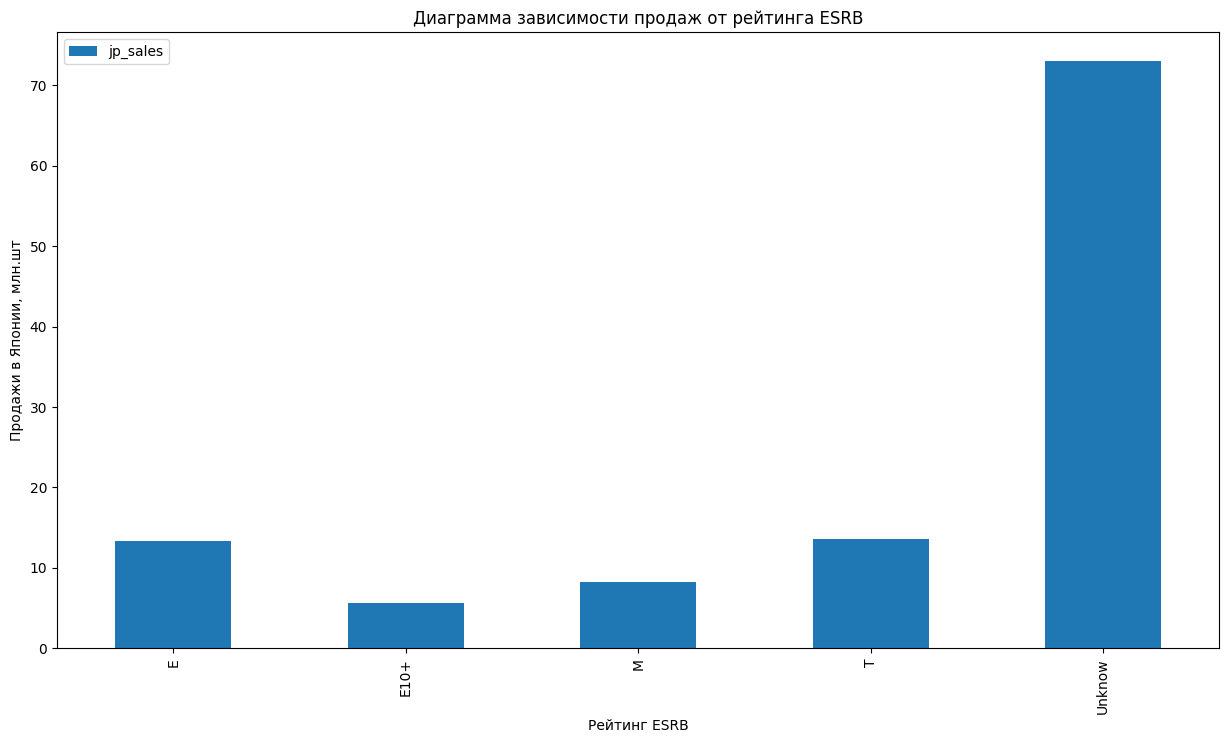

In [ ]:
(
    df_actual_period
    .pivot_table(index='rating', values='jp_sales', aggfunc='sum')
    .plot(kind='bar', figsize=(15,8))
)
plt.title('Диаграмма зависимости продаж от рейтинга ESRB')
plt.ylabel('Продажи в Японии, млн.шт')
plt.xlabel('Рейтинг ESRB')
plt.show();

<a id='section_4_4'></a>
#### Остальные страны

<a id='section_4_4_1'></a>
##### Самые популярные платформы

In [ ]:
(
    df_actual_period
    .pivot_table(index='platform', values='other_sales', aggfunc='sum')
    .sort_values(by='other_sales', ascending=False)
    .head()
)

,other_sales
platform,
PS4,48.35
XOne,14.27
3DS,6.28
WiiU,4.69
PSV,3.26


In [ ]:
for platform, group in df_actual_period.groupby('platform'):
    share_sales = (group['other_sales'] / group['total_sales']).median()
    print()
    print(f'Доля продаж игр для платформы {platform} в остальных странах - {share_sales:.2%}')


Доля продаж игр для платформы 3DS в остальных странах - 0.00%

Доля продаж игр для платформы PC в остальных странах - 0.00%

Доля продаж игр для платформы PS4 в остальных странах - 14.93%

Доля продаж игр для платформы PSV в остальных странах - 0.00%

Доля продаж игр для платформы WiiU в остальных странах - 7.69%

Доля продаж игр для платформы XOne в остальных странах - 8.74%


**Промежуточный вывод:** В остальных странах преимущество у игр для приставок PS4. За ними игры для платформы XOne. Чуть отстают от них игры на платформах PC и WiiU

<a id='section_4_4_2'></a>
##### Самые популярные жанры

In [ ]:
(
    df_actual_period
    .pivot_table(index='genre', values='other_sales', aggfunc='sum')
    .sort_values(by='other_sales', ascending=False)
)

,other_sales
genre,
Action,21.92
Shooter,20.89
Sports,11.90
Role-Playing,9.18
Racing,3.21
Platform,3.13
Misc,3.09
Fighting,2.68
Adventure,1.66


**Промежуточный итог:** В остальных странах покупатели отдают предпочтение играм жанров Action и Shooter. Наименьшее предпочтение покупатели отдают жанрам Puzzle, Strategy и Adventure. В целом, картина схожа с продажами в регионах Северной Америки и Европе.

<a id='section_4_4_3'></a>
##### Влияние рейтинга ESRB на продажи

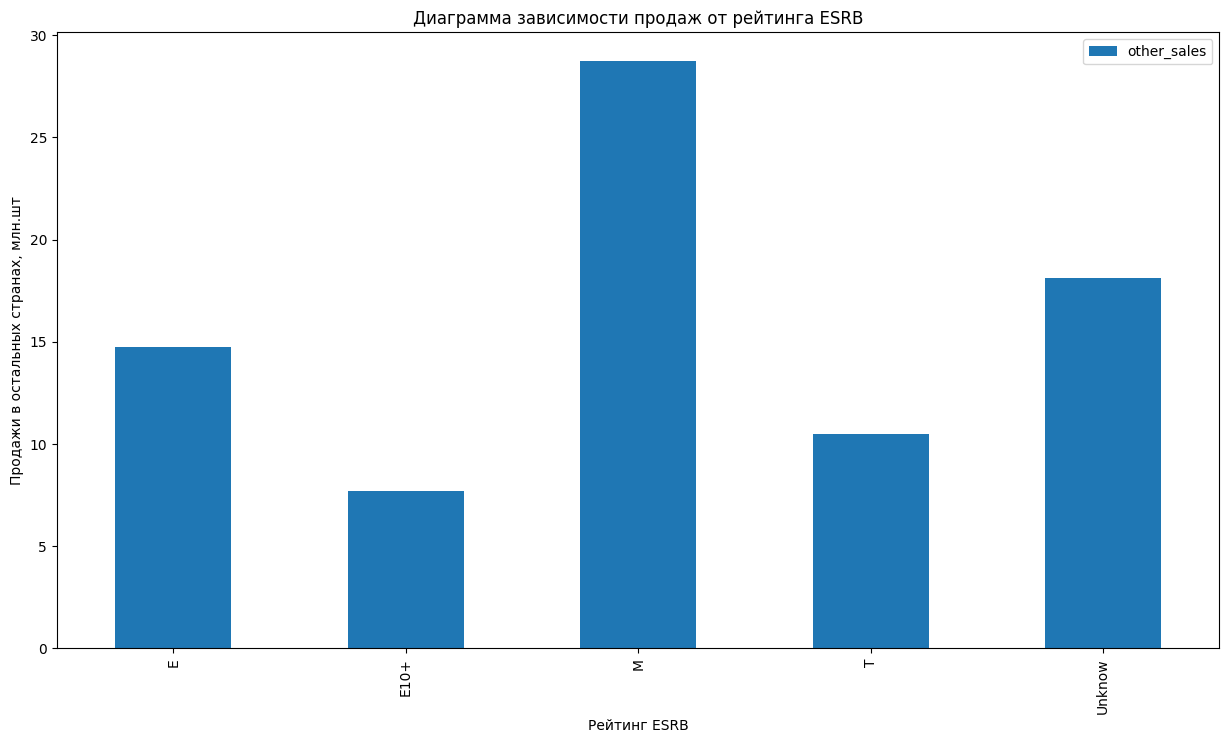

In [ ]:
(
    df_actual_period
    .pivot_table(index='rating', values='other_sales', aggfunc='sum')
    .plot(kind='bar', figsize=(15,8))
)
plt.title('Диаграмма зависимости продаж от рейтинга ESRB')
plt.ylabel('Продажи в остальных странах, млн.шт')
plt.xlabel('Рейтинг ESRB')
plt.show();

**Промежуточный вывод:** Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. Таким образом, рейтинг маркирует только игры, разработанные в этих странах, то есть для разработчиков из других регионов этот рейтинг не заполняется.

Исходя из этого, было принято решение установить заглушку в пропущенных данных, чтобы проследить взаимосвязь по продажам. Было выявлено, что в Северной Америке большую часть продаж занимают игры с рейтингом «M» («Mature») — «Для взрослых», за ним следом идут игры со значением «Unknow», затем, «E» («Everyone») — «Для всех» и «T» («Teen») — «Подростки». Аналогичное распределение наблюдается и в странах Европы.
В Японии же картина несколько отличается. Наиболее продаваемыми здесь являются игры со значением «Unknow», затем, со значительным отрывом, игры с рейтингом рейтингом «E», «T», «M» и «E10+».

Данные, помеченные значением «Unknow» в столбце рейтинга ESRB означают, что эти игры были выпущены за пределами Северной Америки и Канады.

<a id='section_5'></a>
### Проверка гипотез

<a id='section_5_1'></a>
#### Средние пользовательские рейтинги платформ XOne и PC одинаковые

**Нулевая гипотеза:** Средние пользовательские рейтинги одинаковые;

**Альтернативная гипотеза:** Средние пользовательские рейтинги различны.

In [ ]:
# Выберем две совокупности пользовательских оценок платформ XOne и PC
xone_median_user_rating = df_actual_period.query('platform == "XOne" and user_score.notna()')['user_score']
pc_median_user_rating = df_actual_period.query('platform == "PC" and user_score.notna()')['user_score']

# Выберем критические уровень статистической значимости на уровне 5%
alpha = .05

results = st.ttest_ind(
    xone_median_user_rating,
    pc_median_user_rating,
    equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.147597032047728
Не получилось отвергнуть нулевую гипотезу


**Результат проверки гипотезы:** По результатам проверки, гипотезу о равенстве средних пользовательских рейтингов платформ XOne и PC отвергнуть не получилось, так как вероятность случайно получить такое различие равно 61,3%

<a id='section_5_2'></a>
#### Средние пользовательские рейтинги жанров Action и Sports разные

**Нулевая гипотеза:** Средние пользовательские рейтинги одинаковы;

**Альтернативная гипотеза:** Средние пользовательские рейтинги различны.

In [ ]:
# Выберем две совокупности пользовательских оценок жанров Action и Sports
action_median_user_rating = df_actual_period.query('genre == "Action" and user_score.notna()')['user_score']
sports_median_user_rating = df_actual_period.query('genre == "Sports" and user_score.notna()')['user_score']

# Выберем критические уровень статистической значимости на уровне 5%
alpha = .05

results = st.ttest_ind(
    action_median_user_rating,
    sports_median_user_rating,
    equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.2678140416803603e-11
Отвергаем нулевую гипотезу


**Результат проверки гипотезы:** По результатам проверки, гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports отвергаем.

**Промежуточный вывод:** Уровень значимости численно определяет, где проходит граница вероятности попасть слишком далеко от центра распределения. Общепринятые пороговые значения 1% или 5%. Сравнивая результаты статистики разности в стандартных отклонениях (p-значение) с уровнем значимости (aplha), понимаем, что на результаты проверки гипотез они не влияют. Поэтому, было принято решение взять значение уровня значимости на уровне 5%, как общепринятое.

<a id='section_6'></a>
### Общий вывод

В данном исследовании мы изучили данные о продажах игр, полученные из открытых источников и выявили определяющие успешность игры закономерности. Это позволяет сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

1. На первом этапе работы мы произвели чтение данных из предоставленного файла и оценили качество полученных данных.


2. На втором этапе произвели предварительную обработку данных
    - Привели наименования всех столбцов датафрейма к нижнему регистру для удобства работы с данными;
    - Заменили типы данных столбца `year_of_release` для правильного отображения года выпуска, а также столбца `user_score`, для избежания ошибок в дальнейших вычислениях;
    - Произвели обработку пропусков данных. Строки с пропусками в столбцах `name` и `genre` удалили, так как их было все 2 и на весь датафрейм влияния эти данные не оказывали. Пропущенные строки из `year_of_release` занимали всего 1,6% от общего количества данных датафрейма, поэтому их также было решено удалить. Остальные пропуски было решено оставить нулевыми, так как удалять такой объем строк было бы некорректно, а заменить их синтетическими данными не получилось, так как не прослеживалась явная взаимосвязь;
    - Добавили в датафрейм дополнительный столбец `total_sales` и записали в него вычисленное количество проданных копий игр о всех регионах.
    
    
3. Третьем этапом произвели исследовательский анализ данных
    - Изучили количество игр выпущенных в разные годы и выявили, что наибольшее количество игр было выпущено в период с 2008 по 2010 годы;
    - Изучили, как платформы сменяли друг друга со временем и выявили, что характерный срок существования платформ составляет от 8 до 11 лет. Исходя из этого, приняли актуальный период для построения прогноза - от 2008 до 2016 года;
    - Выяснили, какие платформы лидируют по продажам на выбранном временном отрезке. Отсеяв уже неактуальные платформы, а также платформы, срок существования уже близок к критическому, создали список потенциально прибыльных платформ (PlayStation 4, Nintendo 3DS, Xbox One, Nintendo Wii U, PlayStation Vita и PC);
    - Изучили, какие из актуальных платформ лидируют по продажам. Согласно построенной диаграмме размаха, наибольшие глобальные продажи приносят платформы PlayStation 4, Xbox One и Nintendo Wii U;
    - Исследовали с применением коэффициента корреляции Пирсона взаимосвязи пользовательских оценок и оценок критиков с продажами для каждой из платформ. Согласно получившимся результатам, у таких платформ, как PlayStation 4, PlayStation Vita и Xbox One оценки пользователей имели слабое влияние на продажи, а оценки критиков имеют среднее влияние. Однако, если рассматривать портативные виды платформ, такие как Nintendo 3DS и Nintendo Wii U, то увидим, что оценки пользователей также начинают влиять на продажи;
    - Построили общее распределение игр по жанрам и выявили выраженное преимущество таких жанров, как Action, Shooter и Role-Playing, а жанры Puzzle, и Strategy находятся в конце рейтинга;


4. На четвертом этапе составим портрет пользователя каждого региона отдельно:
    - В Северной Америке большие продажи имеют игры для платформ PlayStation 4 и Xbox One. Из жанров игр, американцы предпочитают Shooter и Action. Игры жанров Strategy, Puzzle и Adventure занимают последние места;
    - В европейских странах предпочитают игры на платформах, как PlayStation 4 и Xbox One. Как и пользователи Северной Америки, в европейских странах распределение по жанрам схоже;
    - В Японии самой популярной является платформа Nintendo 3DS. В процессе исследования выявился интересный факт - доля платформы PlayStation Vita в Японии составляет 100%. Можно предположить, что эта платформа продавалась, преимущественно на территории Японии. В случае с жанровыми предпочтениями, в Японии наиболее предпочтительными являются Role-Playing и Action, чуть позади - Simulator и Platform.
    - В остальных странах с большим отрывом лидируют игры для платформы PlayStation 4. В случае с жанровыми предпочтениями, ситуация почти повторяет результаты в Северной Америке и Европе.
    
    
5. На заключительном этапе мы проверили две гипотезы. В процессе проверки гипотезы, приняли критический уровень статистической значимости и применили критерий ttest_int, так как выборки не зависят друг от друга
    - Средние пользовательские рейтинги платформ Xbox One и PC отвергнуть не получилось;
    - Равенство средних пользовательских рейтингов жанров Action и Sports отвергаем.
    

**Заключение:**
На основании данных проведенного исследования, можно предположить, что в 2017 году самыми продаваемыми играми станут игры на платформе PlayStation 4, так как, по итогу нашего исследования, эта платформа популярна во всех регионах. Самым популярным жанром является Action с рейтингом ESRB "M"